# Logistic regression

* 

In [14]:
import sys
assert sys.version_info >= (3,5)

In [15]:
import sklearn
assert sklearn.__version__ > "1"

In [16]:
sklearn.__version__

'1.0.1'

In [17]:
from sklearn.datasets import make_classification

In [18]:
X,y=make_classification(n_samples=100, n_features=1,n_informative=1, n_redundant=0, n_classes=2,n_clusters_per_class=1, random_state=42)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
sns.set_theme(style='darkgrid')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.2, random_state=42)

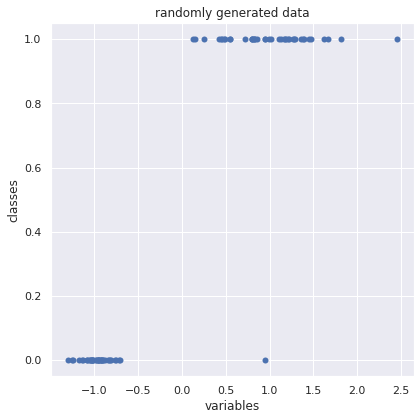

In [10]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x=train_X.reshape((len(train_X,))), y=train_y,sizes=(1, 8), linewidth=0, ax=ax)
plt.title('randomly generated data')
plt.ylabel('classes')
plt.xlabel('variables')
plt.show()

In [11]:
import statsmodels

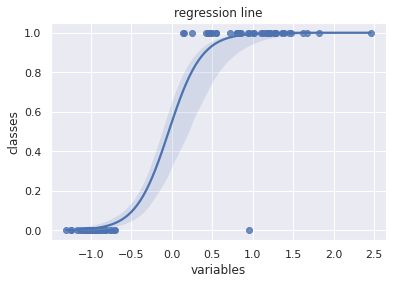

In [14]:
sns.regplot(x=train_X,y=train_y, logistic=True)
plt.title('regression line')
plt.ylabel('classes')
plt.xlabel('variables')
plt.show()

In [2]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [13]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(train_X, train_y)

LogisticRegression()

In [21]:
train_y_pred = log_reg.predict(train_X)

In [22]:
train_y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [25]:
train_y_prob = log_reg.predict_proba(train_X)

In [29]:
train_y_prob.shape

(80, 2)

In [27]:
train_y_pred.shape

(80,)

In [53]:
class LogRegression(BaseEstimator, ClassifierMixin):
    def __init__(self,max_iter=1000, tol=1e-4):
        self.max_iter = max_iter
        self.tol = tol
    
    
    def logit_score(self,yhat):
        return 1/(1 + np.exp(-yhat))
    
    def fit(self,X,y):
        X=np.hstack((np.ones((len(X),1)),X)) #adding intercept term to each training example (m,n+1)
        y=y.reshape(len(y),1) #reshaping to column vector
        theta = np.random.rand(X.shape[1] ,1) # (n+1,1)
        
        for i in range(0,self.max_iter):
            gradient = X.T.dot(y - self.logit_score(X.dot(theta)))
            hessian = X.T @ X
            theta = theta + np.matmul(np.linalg.inv(hessian), gradient) #newton's method 
        
        self.coef_ = theta
        return self
    
    def predict(self,X):
        X=np.hstack((np.ones((len(X),1)),X))
        
        return (self.logit_score(X.dot(self.coef_)) > 0.5 ).astype(int)
        

In [54]:
newton_method = LogRegression(max_iter=100)

In [55]:
newton_method.fit(X,y)

LogRegression(max_iter=100)

In [57]:
pred = newton_method.predict(X)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y,pred)

array([[50,  1],
       [ 0, 49]])

In [3]:
import numpy as np

# comparison with scikit-learn's LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_reg = LogisticRegression(solver='newton-cg')

In [62]:
log_reg.fit(X,y)

LogisticRegression(solver='newton-cg')

In [66]:
pred = log_reg.predict(X)

In [67]:
confusion_matrix(y,pred)

array([[50,  1],
       [ 0, 49]])